In [1]:
import torch
from Define_Model.ResNet import ThinResNet
from Define_Model.Loss.SoftmaxLoss import AdditiveMarginLinear

import numpy as np
import kaldi_io
import matplotlib.pyplot as plt
import matplotlib
import pickle
import pathlib
from python_speech_features import mel2hz
import Process_Data.constants as c


%matplotlib inline
plt.rc('font', family='Times New Roman')


In [2]:
gradient_dir = '/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient'

In [3]:
# CnCeleb 12 and 1
pic_f = gradient_dir + '/TDNN_v5/cnceleb/klfb_egs12_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/epoch_60_var_gradient/epoch_60/time.data.pickle'

with open(pic_f, 'rb') as f:
    c2t_data = pickle.load(f)
    
pic_ff = '/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/cnceleb/klfb_egs12_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/epoch_60_var_gradient/epoch_60/freq.data.pickle'

with open(pic_ff, 'rb') as f:
    c2f_data = pickle.load(f)
    
    
pic_f = gradient_dir + '/TDNN_v5/cnceleb/klfb_egs_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/epoch_50_var_gradient/epoch_50/time.data.pickle'

with open(pic_f, 'rb') as f:
    c1t_data = pickle.load(f)
    
pic_ff = gradient_dir + '/TDNN_v5/cnceleb/klfb_egs_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/epoch_50_var_gradient/epoch_50/freq.data.pickle'

with open(pic_ff, 'rb') as f:
    c1f_data = pickle.load(f)

In [4]:
# VoxCeleb 1

# ThinResNet34
pic_f = gradient_dir + '/ThinResNet34/vox1/klfb_egs_baseline/arcsoft_sgd_rop/Mean_basic_none1_SAP2_dp125_alpha0_em256_wd5e4_var/epoch_50_var_gradient/epoch_50/time.data.pickle'

with open(pic_f, 'rb') as f:
    v1t_data = pickle.load(f)
    
pic_ff = gradient_dir + '/ThinResNet34/vox1/klfb_egs_baseline/arcsoft_sgd_rop/Mean_basic_none1_SAP2_dp125_alpha0_em256_wd5e4_var/epoch_50_var_gradient/epoch_50/freq.data.pickle'

with open(pic_ff, 'rb') as f:
    v1f_data = pickle.load(f)

# TDNN
pic_f = gradient_dir + '/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/epoch_50_var_gradient/epoch_50/time.data.pickle'

with open(pic_f, 'rb') as f:
    v1t_data_td = pickle.load(f)
    
pic_ff = gradient_dir + '/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/epoch_50_var_gradient/epoch_50/freq.data.pickle'

with open(pic_ff, 'rb') as f:
    v1f_data_td = pickle.load(f)

# VoxCeleb 2
pic_f = gradient_dir + '/TDNN_v5/vox2/klfb_egs_baseline/arcsoft_sgd_exp/inputMean_STAP_em512_wde4_var/epoch_50_var_gradient/epoch_50/time.data.pickle'

with open(pic_f, 'rb') as f:
    v2t_data_td = pickle.load(f)
    
pic_ff = gradient_dir + '/TDNN_v5/vox2/klfb_egs_baseline/arcsoft_sgd_exp/inputMean_STAP_em512_wde4_var/epoch_50_var_gradient/epoch_50/freq.data.pickle'

with open(pic_ff, 'rb') as f:
    v2f_data_td = pickle.load(f)

In [6]:
list(c1f_data.keys())[:2]

['train.time.mean', 'train.time.var']

In [7]:
m = np.linspace(0, 2840.0230467083188, 40)
x = mel2hz(m)

In [8]:
np.concatenate(v1t_data, axis=1).shape

(2, 991581, 40)

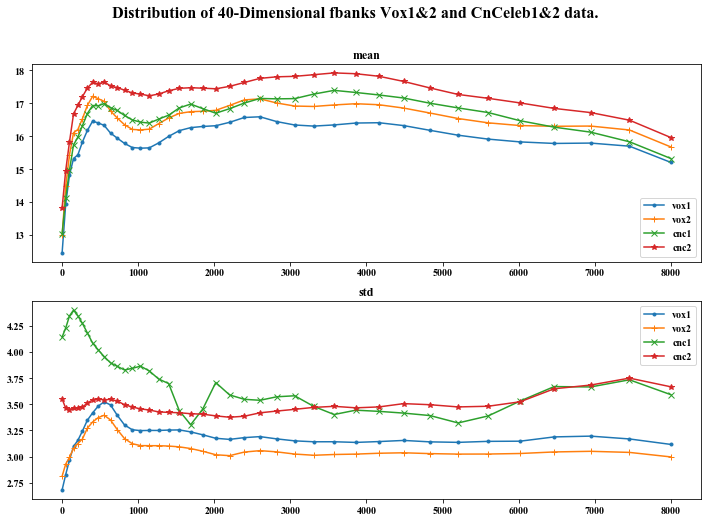

In [10]:
plt.figure(figsize=(12, 8))
plt.suptitle("Distribution of 40-Dimensional fbanks Vox1&2 and CnCeleb1&2 data.", fontsize=16)

v2t_tm = np.concatenate(v2t_data_td, axis=1)[0].mean(axis=0)
v2t_tv = np.concatenate(v2t_data_td, axis=1)[0].std(axis=0)

# vt_tm /= vt_tm.sum()

v1t_tm = np.concatenate(v1t_data, axis=1)[0].mean(axis=0)
v1t_tv = np.concatenate(v1t_data, axis=1)[0].std(axis=0)

# v1t_tm /= v1t_tm.sum()

c2t_tm = np.concatenate(c2t_data, axis=1)[0].mean(axis=0)
c2t_tv = np.concatenate(c2t_data, axis=1)[0].std(axis=0)

c1t_tm = np.concatenate(c1t_data, axis=1)[0].mean(axis=0)
c1t_tv = np.concatenate(c1t_data, axis=1)[0].std(axis=0)


# ct_tm /= ct_tm.sum()
plt.subplot(2,1,1)
plt.title("mean")

plt.plot(x, v1t_tm, marker='.')
plt.plot(x, v2t_tm, marker='+')
plt.plot(x, c1t_tm, marker='x')
plt.plot(x, c2t_tm, marker='*')
plt.legend(['vox1', 'vox2', 'cnc1', 'cnc2'])

plt.subplot(2,1,2)
plt.title("std")

plt.plot(x, v1t_tv, marker='.')
plt.plot(x, v2t_tv, marker='+')
plt.plot(x, c1t_tv, marker='x')
plt.plot(x, c2t_tv, marker='*')

plt.legend(['vox1', 'vox2', 'cnc1', 'cnc2'])

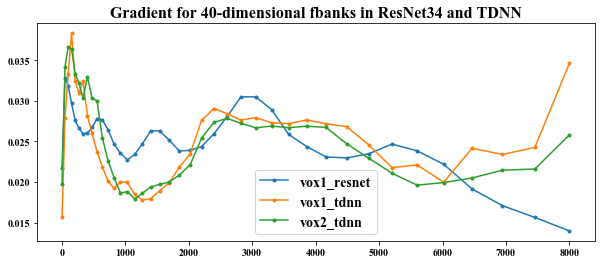

In [11]:
plt.figure(figsize=(10, 4))
plt.title("Gradient for 40-dimensional fbanks in ResNet34 and TDNN", fontsize=16)
v1f_tm = v1f_data['train.time.mean']
v1f_tm /= v1f_tm.sum()

v1f_tv = v1f_data['train.time.var']
v1f_tv /= v1f_tv.sum()

# plt.subplot(2,1,1)
plt.plot(x, v1f_tm, marker='.')
# plt.plot(x, v1f_tv, marker='x')
# plt.legend(['vox1_mean', 'vox1_var'])

v1f_tm_td = v1f_data_td['train.time.mean']
v1f_tm_td /= v1f_tm_td.sum()

v1f_tv_td = v1f_data_td['train.time.var']
v1f_tv_td /= v1f_tv_td.sum()

# plt.subplot(2,1,2)
plt.plot(x, v1f_tm_td, marker='.')
# plt.plot(x, v1f_tv_td, marker='x')

v2f_tm_td = v2f_data_td['train.time.mean']
v2f_tm_td /= v2f_tm_td.sum()

v2f_tv_td = v2f_data_td['train.time.var']
v2f_tv_td /= v2f_tv_td.sum()
plt.plot(x, v2f_tm_td, marker='.')


plt.legend(['vox1_resnet', 'vox1_tdnn', 'vox2_tdnn'], fontsize=14)

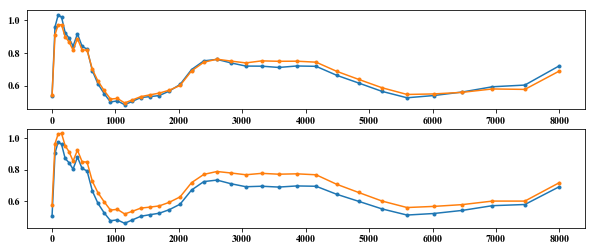

In [16]:
# Refine the weight considering the megnitude of input
plt.figure(figsize=(10, 4))
plt.subplot(211)
v2f_tm_td_norm = v2f_tm_td/v2f_tm_td.max()
c1f_tm_td_refine1 = v2f_tm_td_norm*v2t_tm/c1t_tm
c1f_tm_td_refine2 = v2f_tm_td_norm/v2t_tm*c1t_tm
# plt.plot(x, v2f_tm_td_norm*v2t_tm, marker='.')
# plt.plot(x, v2f_tm_td, marker='.')
plt.plot(x, c1f_tm_td_refine1, marker='.')
plt.plot(x, c1f_tm_td_refine2, marker='.')

plt.subplot(212)
v2f_tm_td_norm = v2f_tm_td/v2f_tm_td.max()
c2f_tm_td_refine1 = v2f_tm_td_norm*v2t_tm/c2t_tm
c2f_tm_td_refine2 = v2f_tm_td_norm/v2t_tm*c2t_tm
# plt.plot(x, v2f_tm_td_norm*v2t_tm, marker='.')
# plt.plot(x, v2f_tm_td, marker='.')
plt.plot(x, c2f_tm_td_refine1, marker='.')
plt.plot(x, c2f_tm_td_refine2, marker='.')





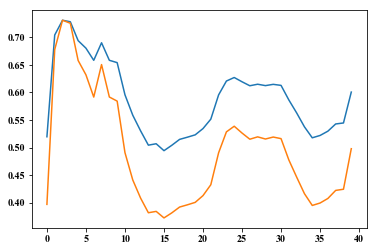

In [23]:
# considering the mean and gradient, the weights seems to be almost the same

# for ynew in [v2f_tm_td, c2f_tm_td_refine1, c2f_tm_td_refine2]:
for l in [v2f_tm_td]:
#     ynew = np.array(ynew)
    ynew = torch.tensor(l)
    ynew /= ynew.max()
    ynew = ynew * 2 - 1
    plt.plot(torch.nn.functional.sigmoid(ynew))
    
    ynew = torch.FloatTensor(l)
    ynew = torch.pow(ynew,2)
    ynew /= ynew.max()
    ynew = ynew * 2 - 1
    plt.plot(torch.nn.functional.sigmoid(ynew))
    

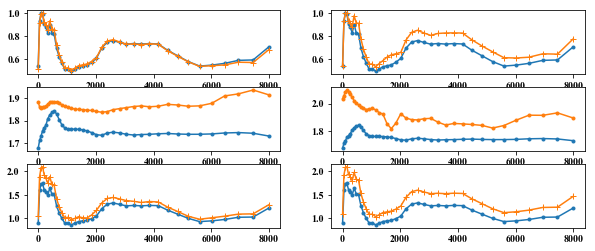

In [17]:
# Refine the weight considering the megnitude of input
plt.figure(figsize=(10, 4))

v2f_tm_td_norm = v2f_tm_td/v2f_tm_td.max()

c2f_tm_td_refine1 = v2f_tm_td_norm*np.sqrt(v2t_tv)/np.sqrt(c2t_tv)
# c2f_tm_td_refine2 = v2f_tm_td_norm/np.sqrt(v2t_tv)*c2t_tm
c2f_tm_td_refine1_norm = c2f_tm_td_refine1/c2f_tm_td_refine1.max()

c1f_tm_td_refine1 = v2f_tm_td_norm*np.sqrt(v2t_tv)/np.sqrt(c1t_tv)
# c2f_tm_td_refine2 = v2f_tm_td_norm/np.sqrt(v2t_tv)*c2t_tm
c1f_tm_td_refine1_norm = c1f_tm_td_refine1/c1f_tm_td_refine1.max()

# plt.plot(x, v2f_tm_td_norm*v2t_tm, marker='.')
# plt.plot(x, v2f_tm_td, marker='.')
plt.subplot(321)
plt.plot(x, v2f_tm_td_norm, marker='.')
plt.plot(x, c2f_tm_td_refine1_norm, marker='+')

plt.subplot(322)
plt.plot(x, v2f_tm_td_norm, marker='.')
plt.plot(x, c1f_tm_td_refine1_norm, marker='+')
# plt.plot(x, c2f_tm_td_refine2, marker='.')

plt.subplot(323)
plt.plot(x, np.sqrt(v2t_tv), marker='.')
plt.plot(x, np.sqrt(c2t_tv), marker='.')

plt.subplot(324)
plt.plot(x, np.sqrt(v2t_tv), marker='.')
plt.plot(x, np.sqrt(c1t_tv), marker='.')

plt.subplot(325)
plt.plot(x, v2f_tm_td_norm*np.sqrt(v2t_tv), marker='.')
plt.plot(x, c2f_tm_td_refine1_norm*np.sqrt(c1t_tv), marker='+')

plt.subplot(326)
plt.plot(x, v2f_tm_td_norm*np.sqrt(v2t_tv), marker='.')
plt.plot(x, c1f_tm_td_refine1_norm*np.sqrt(c1t_tv), marker='+')

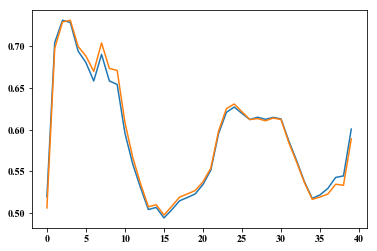

In [15]:
for ynew in [v2f_tm_td_norm, c2f_tm_td_refine1_norm]:
#     ynew = np.array(ynew)
    ynew = torch.tensor(ynew)
    ynew /= ynew.max()
    ynew = ynew * 2 - 1
    plt.plot(torch.nn.functional.sigmoid(ynew))

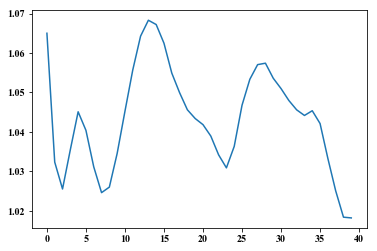

In [51]:
plt.plot(c2t_tm/v2t_tm)

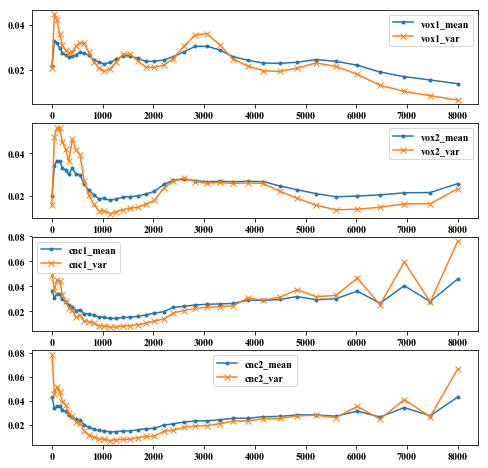

In [44]:
plt.figure(figsize=(8, 8))

v2f_tm = v2f_data_td['train.time.mean']
v2f_tm /= v2f_tm.sum()

v2f_tv = v2f_data_td['train.time.var']
v2f_tv /= v2f_tv.sum()

v1f_tm = v1f_data['train.time.mean']
v1f_tm /= v1f_tm.sum()

v1f_tv = v1f_data['train.time.var']
v1f_tv /= v1f_tv.sum()

plt.subplot(4,1,1)
plt.plot(x, v1f_tm, marker='.')
plt.plot(x, v1f_tv, marker='x')
plt.legend(['vox1_mean', 'vox1_var'])

plt.subplot(4,1,2)
plt.plot(x, v2f_tm, marker='.')
plt.plot(x, v2f_tv, marker='x')
plt.legend(['vox2_mean', 'vox2_var'])

c2f_tm = c2f_data['train.time.mean']
c2f_tm /= c2f_tm.sum()
c2f_tv = c2f_data['train.time.var']
c2f_tv /= c2f_tv.sum()

c1f_tm = c1f_data['train.time.mean']
c1f_tm /= c1f_tm.sum()
c1f_tv = c1f_data['train.time.var']
c1f_tv /= c1f_tv.sum()

plt.subplot(4,1,3)

plt.plot(x, c1f_tm, marker='.')
plt.plot(x, c1f_tv, marker='x')
plt.legend(['cnc1_mean', 'cnc1_var'])

plt.subplot(4,1, 4)

plt.plot(x, c2f_tm, marker='.')
plt.plot(x, c2f_tv, marker='x')
plt.legend(['cnc2_mean', 'cnc2_var'])


In [53]:
vf_data['train.time.mean']

array([0.00019034, 0.0003297 , 0.00035303, 0.00035056, 0.00032109,
       0.00030986, 0.00029226, 0.00031788, 0.0002923 , 0.000289  ,
       0.00024498, 0.00021814, 0.000198  , 0.00017957, 0.00018138,
       0.0001725 , 0.0001794 , 0.00018697, 0.00018979, 0.0001928 ,
       0.00020086, 0.00021303, 0.00024485, 0.00026347, 0.00026829,
       0.00026246, 0.00025707, 0.00025914, 0.00025725, 0.00025897,
       0.00025758, 0.00023811, 0.00022113, 0.00020308, 0.00018901,
       0.00019201, 0.0001975 , 0.0002068 , 0.0002081 , 0.00024858])

In [54]:
v1f_data['train.time.mean']

array([0.00011526, 0.00020538, 0.00024474, 0.00028186, 0.00023855,
       0.00022763, 0.0002383 , 0.000207  , 0.00019104, 0.00017443,
       0.00016093, 0.00014799, 0.00014126, 0.0001474 , 0.00014662,
       0.00013583, 0.00013075, 0.00013204, 0.00013925, 0.00014624,
       0.00016057, 0.00017249, 0.00020289, 0.00021363, 0.00020906,
       0.00020319, 0.00020536, 0.00020073, 0.00019998, 0.00020331,
       0.00019988, 0.00019721, 0.00018085, 0.00016006, 0.00016252,
       0.00014695, 0.00017764, 0.00017202, 0.0001784 , 0.00025446])

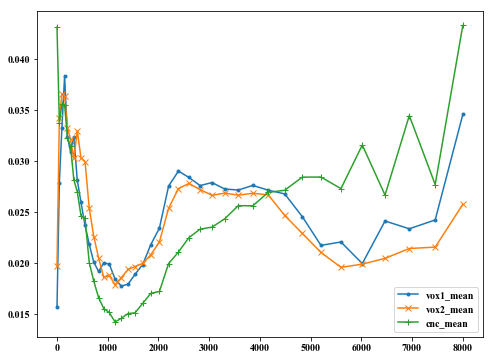

In [51]:
plt.figure(figsize=(8, 6))

plt.plot(x, v1f_tm, marker='.')
plt.plot(x, vf_tm, marker='x')
plt.plot(x, cf_tm, marker='+')

plt.legend(['vox1_mean', 'vox2_mean', 'cnc_mean'])


# Apparently, contrast to VoxCeleb&2, the knowledge the tdnn learned for CnCeleb is more focus on higher frequency subbands.
# However, the gradient attention in TDNN systems is not extractly the same as it in ResNets.


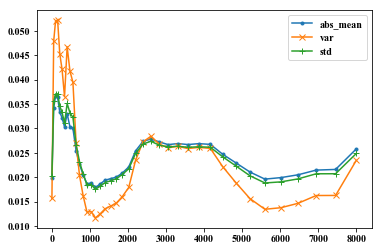

In [49]:
m = np.linspace(0, 2840.0230467083188, 40)
x = mel2hz(m)

abs_mean = f_data['train.time.mean']
var = f_data['train.time.var']

std = np.sqrt(var)

abs_mean /= abs_mean.sum()
var /= var.sum()
std /= std.sum()

plt.plot(x, abs_mean, marker='.')
plt.plot(x, var,  marker='x')
plt.plot(x, std,  marker='+')

plt.legend(['abs_mean', 'var', 'std'])

# The var gradient may be just equal to the power of mean gradient, which makes little difference.

In [21]:
train_grad_all_var = np.zeros((40))
train_grad_var = []
train_grad_abs = []


dir_path = pathlib.Path('/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/vox2/klfb_egs_baseline/arcsoft_sgd_exp/inputMean_STAP_em512_wde4_var/epoch_50_var_gradient/epoch_50')
train_lst = list(dir_path.glob('*train*bin'))
num_utt = 0
for t in train_lst:
    p = str(t)
    with open(p, 'rb') as f:
        sets = pickle.load(f)
        # for (data, grad, uid) in tqdm(sets):
        for (data, grad) in sets:
            train_grad_var.append(np.var(grad, axis=0))
            train_grad_abs.append(np.mean(np.abs(grad), axis=0))

            

In [24]:
train_grad_var_np = np.array(train_grad_var)
train_grad_abs_np = np.array(train_grad_abs)

train_grad_var_var = np.var(train_grad_var_np, axis=0)
train_grad_abs_var = np.var(train_grad_abs_np, axis=0)

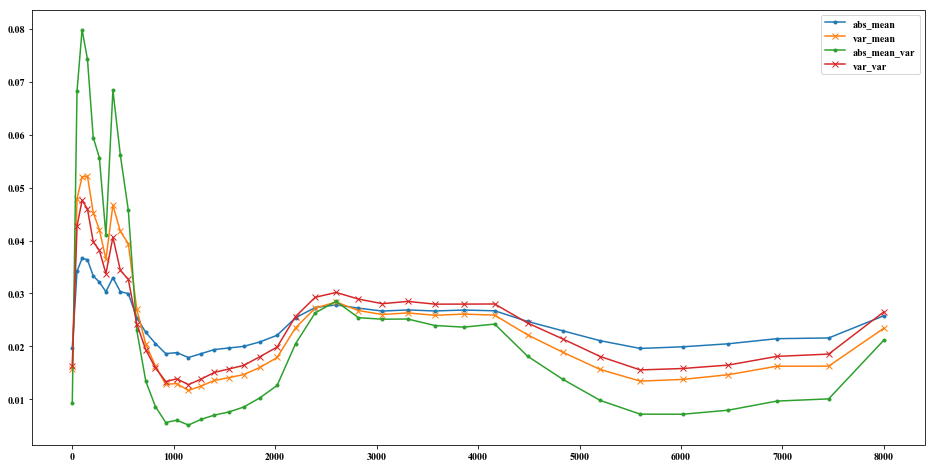

In [28]:
plt.figure(figsize=(16, 8))


train_grad_abs_var /= train_grad_abs_var.sum()
train_grad_var_var /= train_grad_var_var.sum()

plt.plot(x, abs_mean, marker='.')
plt.plot(x, var,  marker='x')

plt.plot(x, train_grad_var_var, marker='.')
plt.plot(x, train_grad_abs_var,  marker='x')

plt.legend(['abs_mean', 'var_mean', 'abs_mean_var', 'var_var'])

In [2]:
train_grad_all_var = np.zeros((40))
train_grad_var = []
train_grad_abs = []


dir_path = pathlib.Path('/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/cnceleb/klfb_egs12_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/epoch_60_var_gradient/epoch_60')
train_lst = list(dir_path.glob('*train*bin'))
num_utt = 0
for t in train_lst:
    p = str(t)
    with open(p, 'rb') as f:
        sets = pickle.load(f)
        # for (data, grad, uid) in tqdm(sets):
        for (data, grad) in sets:
            train_grad_var.append(np.var(grad, axis=0))
            train_grad_abs.append(np.mean(np.abs(grad), axis=0))


In [3]:
train_grad_var_np = np.array(train_grad_var)
train_grad_abs_np = np.array(train_grad_abs)

train_grad_var_var = np.var(train_grad_var_np, axis=0)
train_grad_abs_var = np.var(train_grad_abs_np, axis=0)

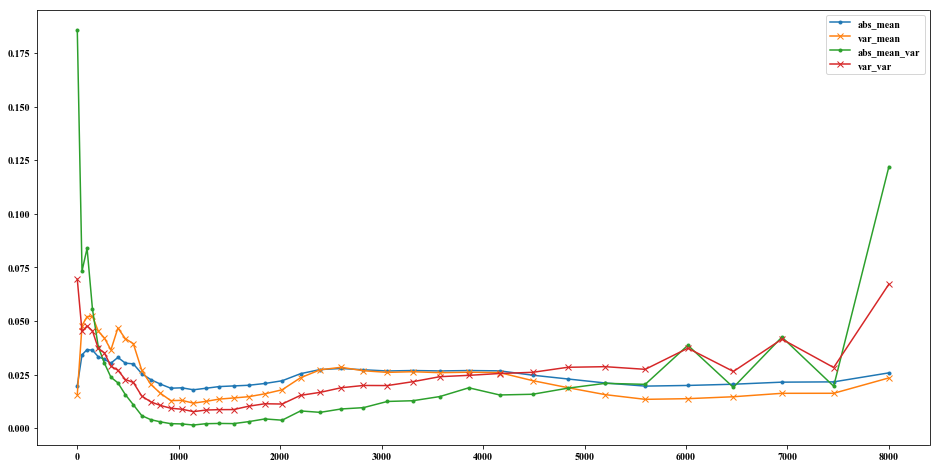

In [10]:
plt.figure(figsize=(16, 8))


train_grad_abs_var /= train_grad_abs_var.sum()
train_grad_var_var /= train_grad_var_var.sum()

plt.plot(x, abs_mean, marker='.')
plt.plot(x, var,  marker='x')

plt.plot(x, train_grad_var_var, marker='.')
plt.plot(x, train_grad_abs_var,  marker='x')

plt.legend(['abs_mean', 'var_mean', 'abs_mean_var', 'var_var'])

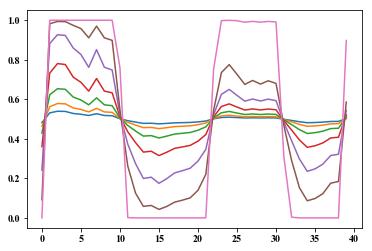

In [6]:
ynew = np.array(c.VOX2_CFB40)
ynew /= ynew.max()

tynew = torch.FloatTensor(ynew)
s = torch.FloatTensor([2, 1., 0.5, 0.25, 0.125, 0.0625, 0.01])
for i in range(len(s)):
    plt.plot(torch.sigmoid((tynew-tynew.mean())/s[i]))
    
plt.show()

In [3]:
model = TDNN_v5(num_classes=1211, embedding_size=512, input_dim=40, input_norm="Mean")
model.classifier = AdditiveMarginLinear(feat_dim=512, num_classes=1211)
ckp = torch.load('/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/checkpoint/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/checkpoint_50.pth')


/home/yangwenhao/local/project/SpeakerVerification-pytorch/Define_Model/Loss/SoftmaxLoss.py:153: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(self.W, gain=1)


In [4]:
model.classifier.W

Parameter containing:
tensor([[ 0.0562, -0.0208,  0.0324,  ...,  0.0125,  0.0342,  0.0196],
        [ 0.0231,  0.0041,  0.0017,  ..., -0.0035, -0.0359, -0.0048],
        [-0.0299, -0.0520, -0.0163,  ..., -0.0114, -0.0561,  0.0260],
        ...,
        [ 0.0170,  0.0379,  0.0446,  ...,  0.0321,  0.0082, -0.0412],
        [-0.0211, -0.0241,  0.0271,  ..., -0.0555,  0.0538, -0.0077],
        [-0.0121,  0.0156, -0.0347,  ...,  0.0047, -0.0296,  0.0134]],
       requires_grad=True)

In [7]:
model

TDNN_v5(
  (inst_layer): Mean_Norm(dim=-2)
  (frame1): TimeDelayLayer_v5(
    (kernel): Conv1d(40, 512, kernel_size=(5,), stride=(1,))
    (nonlinearity): ReLU(inplace=True)
    (bn): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (frame2): TimeDelayLayer_v5(
    (kernel): Conv1d(512, 512, kernel_size=(3,), stride=(1,), dilation=(2,))
    (nonlinearity): ReLU(inplace=True)
    (bn): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (frame3): TimeDelayLayer_v5(
    (kernel): Conv1d(512, 512, kernel_size=(3,), stride=(1,), dilation=(3,))
    (nonlinearity): ReLU(inplace=True)
    (bn): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (frame4): TimeDelayLayer_v5(
    (kernel): Conv1d(512, 512, kernel_size=(1,), stride=(1,))
    (nonlinearity): ReLU(inplace=True)
    (bn): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (frame5): TimeDela

In [5]:
model.load_state_dict(ckp['state_dict'])

<All keys matched successfully>

In [6]:
model.classifier.W

Parameter containing:
tensor([[-0.0049,  0.0013,  0.0158,  ..., -0.0048,  0.0076, -0.0110],
        [-0.0060, -0.0076, -0.0080,  ..., -0.0070, -0.0072, -0.0063],
        [-0.0027, -0.0042, -0.0046,  ..., -0.0036,  0.0786,  0.0252],
        ...,
        [-0.0032,  0.0058,  0.0012,  ...,  0.0014, -0.0047, -0.0011],
        [-0.0147, -0.0008, -0.0120,  ..., -0.0017, -0.0130, -0.0085],
        [-0.0086,  0.0029, -0.0124,  ..., -0.0023,  0.0321,  0.0049]],
       requires_grad=True)

In [8]:
x = kaldi_io.read_mat('/home/work2020/yangwenhao/project/lstm_speaker_verification/data/vox1/egs/klfb/klfb/valid_fb40/feat.0.ark:4')
x = torch.FloatTensor(x)

In [10]:
model.eval()
l,f = model(x[:300].unsqueeze(0))

In [14]:
l[0][547]

tensor(0.7839, grad_fn=<SelectBackward>)